In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
# NLTK Stop words
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 're', 'edu', 'use', '-pron-',])
#'ningirsu', 'lugal', 'habura', 'lumma', 'dabrum', 'shulmushpa', 'inshushinak', 'lagash', 'ninsuna', 'eshnunna', 'zabshali', 'dumuzi', 'aanepada', 'simurrum', 'tirigan', 'enakale', 'urbillum', 'geshtinanna', 'ephur', 'shin', 'sippar', 'ephur', 'magur', 'shatillu', 'garta', 'alumidatum', 'nushushmar', 'alum', 'gisha', 'ninmarki', 'hendursag', 'guedena', 'hegal', 'erridupizir', 'ninshubur', 'ninhursaga', 'enlil', 'sargon', 'lugalmarda', 'shin', 'kazallu', 'push', 'bashar', 'shishil', 'dada', 'nisaba', 'dudu', 'eanatum', 'enmetena', 'ningal', 'dagan', 'urlumma', 'eridu', 'ibbisin', 'tiwa', 'nagarbi', 'abgal', 'zubi', 'meenlil', 'usarum', 'ilaba', 'annunitum', 'apiak', 'anshan', 'subartum', 'kigal', 'eresh', 'apiak', 'meenili', 'utu', 'magan', 'lugalkiginedudu', 'sharkalisharri', 'shin', 'gunidu', 'bagara', 'tirash', 'ningirsus', 'ebla', 'utu_hegal', 'utuhegal', 'ishkur', 'enanatum', 'baba', 'antasur', 'uruxkar', 'rec', 'gatumdu', 'nergal', 'simashki', 'lugal_uruxkar', 'enki', 'shara', 'uruk', 'nippur', 'mari', 'urukagina', 'numushda', 'inanna', 'naram', 'ishtar', 'kurgal', 'ninlil', 'whose', 'shusin', 'umma', 'nanshe', 'amarsin', 'rimush', 'naram_sin', 'girsu', 'shulgi', 'nammu', 'elam', 'agade', 'parahshum', 'shamash', 'susa', 'kish', 'simanum', 'kutha', 'gunida', 'gursar', 'nanna', 'adab', 'ningursaga', 'gutium', 'sheshgar', 'irnina', 'hibaritum', 'ishtar_annunitum', 'ninhursag', 'sin', 'abzu', 'epa', 'ibgal', 'edam', 'dilmun', 'kinir', 'emah', 'ningar', 'giguna', 'eamma', 'eras', 'manishtushu', 'urtur', 'kindazi', 'emeslam', 'emunusgisa', 'ninkununa', 'gipar', 'karzida', 'pasira', 'etemeniguru', 'geshtinana', 'armanum', 'euphrates', 'esar', 'amanus', 'enlil', 'puzur', 'eninsar', 'nissaba', 'rigmushdan', 'etunigaana', 'eduruenki', 'hiritum', 'lagardingirigi', 'kirilum', 'ekur', 'eninnu',' eada', 'eengur', 'imsag', 'zulum', 'igalim', 'eshdugru', 'ahush', 'ninsar', 'shin', 'lugalemush', 'urningirsu', 'enmezianna', 'kian', 'adad', 'eras'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 

In [3]:
#corpus

from glob import glob 
docs = []
for file_name in glob("input/*.txt"):
   with open(file_name, "rt") as ifd:
     for line in ifd:
       tokens = line.strip().split()
       docs.append(tokens)
print(docs)

[['the', 'Esar', 'Mebalak', '551', 'king', 'of', 'Adab'], ['to', 'the', 'goddess', 'Inanna', 'Aka', 'king', 'of', 'Umma'], ['Esar', 'Barahenidu'], ['the', 'Esar', 'Lugaldalu', 'king', 'of', 'Adab'], ['the', 'Esar', 'Lumma'], ['Lumma', 'the', 'ensigar'], ['for', 'the', 'goddess', 'Digirmah', 'Eiginimpae', 'ensi', 'of', 'Adab', 'who', 'built', 'the', 'Emah'], ['for', 'the', 'goddess', 'Digirmah', 'Eiginimpae', 'ensigar', 'of', 'Adab', 'built', 'the', 'Emah', 'for', 'her', 'buried', 'foundation', 'deposits', 'below', 'its', 'base'], ['for', 'the', 'god', 'Ninshubur', 'vizier', 'of', 'the', 'god', 'An', 'for', 'the', 'life', 'of', 'Meskigala', 'ruler', 'of', 'Adab', 'from', 'the', 'cedar', 'mountains', 'he', 'for', 'the', 'lives', 'of', 'his', 'wife', 'and', 'children', 'he', 'dedicated', 'this', 'to', 'the', 'god', 'Ninshubur', 'his', 'god', 'its', 'name', 'is', 'have', 'mercy', 'through', 'prayers'], ['Anubu', 'king', 'of', 'Mari', 'defeated', 'the', 'cities', 'of', 'Aburu', 'and', 'Ilgi

In [4]:
# Convert to list
data = list(docs)
print(data)

[['the', 'Esar', 'Mebalak', '551', 'king', 'of', 'Adab'], ['to', 'the', 'goddess', 'Inanna', 'Aka', 'king', 'of', 'Umma'], ['Esar', 'Barahenidu'], ['the', 'Esar', 'Lugaldalu', 'king', 'of', 'Adab'], ['the', 'Esar', 'Lumma'], ['Lumma', 'the', 'ensigar'], ['for', 'the', 'goddess', 'Digirmah', 'Eiginimpae', 'ensi', 'of', 'Adab', 'who', 'built', 'the', 'Emah'], ['for', 'the', 'goddess', 'Digirmah', 'Eiginimpae', 'ensigar', 'of', 'Adab', 'built', 'the', 'Emah', 'for', 'her', 'buried', 'foundation', 'deposits', 'below', 'its', 'base'], ['for', 'the', 'god', 'Ninshubur', 'vizier', 'of', 'the', 'god', 'An', 'for', 'the', 'life', 'of', 'Meskigala', 'ruler', 'of', 'Adab', 'from', 'the', 'cedar', 'mountains', 'he', 'for', 'the', 'lives', 'of', 'his', 'wife', 'and', 'children', 'he', 'dedicated', 'this', 'to', 'the', 'god', 'Ninshubur', 'his', 'god', 'its', 'name', 'is', 'have', 'mercy', 'through', 'prayers'], ['Anubu', 'king', 'of', 'Mari', 'defeated', 'the', 'cities', 'of', 'Aburu', 'and', 'Ilgi

In [5]:
#Tokenize and Clean-up

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['the', 'esar', 'mebalak', 'king', 'of', 'adab']]


In [6]:
#lemmatize

from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(data_words)

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/Users/meganlewis/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['the', 'esar', 'mebalak', 'king', 'of', 'adab']


In [8]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['esar', 'mebalak', 'king', 'adab']]


In [10]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [11]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('adab', 1), ('esar', 1), ('king', 1), ('mebalak', 1)]]

In [12]:
# step 12

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=500,
                                           alpha='auto',
                                           per_word_topics=True)

In [13]:
# step 13

# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.086*"gutium" + 0.064*"umma" + 0.044*"offspring" + 0.019*"priest" + '
  '0.019*"drive" + 0.019*"ground" + 0.017*"foundation" + 0.017*"urban" + '
  '0.016*"see" + 0.016*"perfectly"'),
 (1,
  '0.194*"ningirsu" + 0.126*"ruler" + 0.093*"lagash" + 0.085*"god" + '
  '0.076*"eanatum" + 0.016*"executive" + 0.015*"nanshe_chief" + '
  '0.013*"control" + 0.012*"guedena" + 0.011*"granted_strength"'),
 (2,
  '0.476*"mighty" + 0.081*"capture" + 0.016*"spouse" + 0.010*"mean" + '
  '0.009*"lieutenant" + 0.009*"esar" + 0.008*"shahuru" + 0.008*"apilkin" + '
  '0.008*"war" + 0.007*"gisha"'),
 (3,
  '0.062*"woman" + 0.033*"son" + 0.027*"goddess" + 0.023*"rivergod" + '
  '0.023*"august" + 0.023*"shennu" + 0.023*"enmezianna" + 0.023*"urningirsu" + '
  '0.022*"puzurishtar" + 0.019*"nanshe"'),
 (4,
  '0.020*"numushda" + 0.020*"tower" + 0.013*"magur" + 0.012*"held_back" + '
  '0.012*"kigal" + 0.012*"hibaritum" + 0.012*"back" + 0.012*"utuhegal" + '
  '0.012*"new" + 0.011*"find"'),
 (5,
  '0.130*"god" +

In [14]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.336794650235171

Coherence Score:  0.4094873442220529


In [15]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/meganlewis/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.312441  0.107772       1        1  17.615652
19     0.081332 -0.083397       2        1  16.763821
12    -0.344841  0.068580       3        1  15.274887
18    -0.226876 -0.317008       4        1  12.291820
16    -0.178358  0.227172       5        1   6.996523
1     -0.155204 -0.122173       6        1   6.605484
8     -0.005765  0.021329       7        1   3.065137
14     0.051036  0.003002       8        1   2.669132
13     0.085292  0.044115       9        1   2.632121
2      0.069534 -0.002947      10        1   2.517160
15     0.084742  0.079098      11        1   2.486622
4      0.101550  0.005953      12        1   2.328637
11     0.070072 -0.052896      13        1   2.042998
7      0.108322  0.021573      14        1   1.759324
9      0.089652  0.004875      15        1   1.463782
10     0.110500  0.008180      16        1   0.915567
0      0.095268  0.034829      17        1   0.750122
17     0.114316  0.013702      18        1   0.665382
6      0.114636  0.013416      19        1   0.587312
3      0.047230 -0.075174      20        1   0.568526, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
2     Default  716.000000          king  716.000000  30.0000  30.0000
12    Default  398.000000         build  398.000000  29.0000  29.0000
144   Default  190.000000        mighty  190.000000  28.0000  28.0000
334   Default  225.000000      ningirsu  225.000000  27.0000  27.0000
24    Default  678.000000           god  678.000000  26.0000  26.0000
1321  Default  109.000000  four_quarter  109.000000  25.0000  25.0000
5     Default  343.000000       goddess  343.000000  24.0000  24.0000
44    Default  205.000000          land  205.000000  23.0000  23.0000
143   Default  207.000000           may  207.000000  22.0000  22.0000
33    Default  152.000000         ruler  152.000000  21.0000  21.0000
61    Default  151.000000           son  151.000000  20.0000  20.0000
333   Default  186.000000        lagash  186.000000  19.0000  19.0000
97    Default  224.000000        temple  224.000000  18.0000  18.0000
65    Default  349.000000         enlil  349.000000  17.0000  17.0000
110   Default   86.000000         canal   86.000000  16.0000  16.0000
30    Default   71.000000          name   71.000000  15.0000  15.0000
7     Default   93.000000          umma   93.000000  14.0000  14.0000
318   Default  153.000000           man  153.000000  13.0000  13.0000
166   Default   68.000000         sumer   68.000000  12.0000  12.0000
188   Default  124.000000          lord  124.000000  11.0000  11.0000
560   Default   79.000000       eanatum   79.000000  10.0000  10.0000
115   Default   93.000000       destroy   93.000000   9.0000   9.0000
202   Default   65.000000          lady   65.000000   8.0000   8.0000
1685  Default   54.000000         akkad   54.000000   7.0000   7.0000
167   Default   52.000000          take   52.000000   6.0000   6.0000
1849  Default   45.000000        shulgi   45.000000   5.0000   5.0000
108   Default  121.000000       beloved  121.000000   4.0000   4.0000
680   Default   57.000000   inscription   57.000000   3.0000   3.0000
363   Default   25.000000         field   25.000000   2.0000   2.0000
39    Default   81.000000          city   81.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
2220  Topic20    1.045346       shuilia    1.831622   4.6090  -4.4537
2210  Topic20    1.045346    accountant    1.831623   4.6090  -4.4537
2221  Topic20    1.045346         warum    1.831622   4.6090  -4.4537
2215  Topic20    1.045346    luxuriance    1.831623   4.6090  -4.4537
2225  Topic20    1.045346        babmer    1.831623   4.6090  -4.4537
2218  Topic20    1.045346  belatteraban    1.831622   4.6090  -4.4537
2217  Topic20    1.045346  belatshuhnir

for doc in corpus:
   print(lda_model.get_document_topics(doc))

for text, doc in zip(texts, corpus):
   print("{}\n{}\n\n".format(text, lda_model.get_document_topics(doc)))

print(lda_model.print_topics(num_topics=6, num_words=20))

In [16]:
#compute coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [17]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

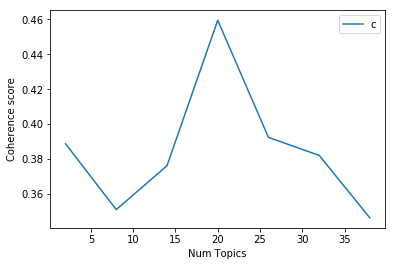

In [18]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3887
Num Topics = 8  has Coherence Value of 0.3509
Num Topics = 14  has Coherence Value of 0.3761
Num Topics = 20  has Coherence Value of 0.4596
Num Topics = 26  has Coherence Value of 0.3923
Num Topics = 32  has Coherence Value of 0.382
Num Topics = 38  has Coherence Value of 0.3461


In [20]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.050*"god" + 0.043*"ningirsu" + 0.035*"eanatum" + 0.030*"ruler" + '
  '0.027*"build" + 0.026*"lagash" + 0.021*"king" + 0.018*"defeat" + '
  '0.017*"son" + 0.015*"goddess"'),
 (1,
  '0.046*"goddess" + 0.042*"god" + 0.026*"ningirsu" + 0.025*"lagash" + '
  '0.024*"ruler" + 0.018*"build" + 0.015*"son" + 0.013*"enanatum" + '
  '0.012*"king" + 0.012*"temple"'),
 (2,
  '0.023*"king" + 0.017*"god" + 0.016*"goddess" + 0.013*"build" + '
  '0.012*"enlil" + 0.011*"governor" + 0.011*"land" + 0.011*"umma" + '
  '0.010*"temple" + 0.010*"form"'),
 (3,
  '0.052*"god" + 0.037*"ningirsu" + 0.022*"eanatum" + 0.021*"ruler" + '
  '0.017*"goddess" + 0.017*"umma" + 0.014*"lagash" + 0.013*"defeat" + '
  '0.009*"build" + 0.008*"leader"'),
 (4,
  '0.032*"king" + 0.019*"god" + 0.019*"may" + 0.013*"destroy" + 0.013*"land" + '
  '0.012*"foundation" + 0.011*"rimush" + 0.010*"elam" + 0.010*"dedicate" + '
  '0.009*"man"'),
 (5,
  '0.058*"build" + 0.039*"god" + 0.038*"king" + 0.028*"lagash" + '
  '0.027*"ningi

In [21]:
#Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.8100,"god, ningirsu, eanatum, ruler, goddess, umma, ...","[the, Esar, Mebalak, 551, king, of, Adab]"
1,1,17.0,0.8417,"king, god, enlil, may, goddess, mighty, land, ...","[to, the, goddess, Inanna, Aka, king, of, Umma]"
2,2,3.0,0.6833,"god, ningirsu, eanatum, ruler, goddess, umma, ...","[Esar, Barahenidu]"
3,3,19.0,0.8100,"king, god, enlil, land, goddess, mighty, woman...","[the, Esar, Lugaldalu, king, of, Adab]"
4,4,14.0,0.6833,"king, goddess, son, dedicate, dedicated, build...","[the, Esar, Lumma]"
5,5,4.0,0.6833,"king, god, may, destroy, land, foundation, rim...","[Lumma, the, ensigar]"
6,6,6.0,0.8812,"god, enlil, goddess, eanatum, may, king, lagas...","[for, the, goddess, Digirmah, Eiginimpae, ensi..."
7,7,6.0,0.9208,"god, enlil, goddess, eanatum, may, king, lagas...","[for, the, goddess, Digirmah, Eiginimpae, ensi..."
8,8,0.0,0.9441,"god, ningirsu, eanatum, ruler, build, lagash, ...","[for, the, god, Ninshubur, vizier, of, the, go..."
9,9,14.0,0.9367,"king, goddess, son, dedicate, dedicated, build...","[Anubu, king, of, Mari, defeated, the, cities,..."


In [22]:
#Find the most representative document for each topic
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9952,"god, ningirsu, eanatum, ruler, build, lagash, ...","[for, the, god, Ningirsu, Eanatum, ruler, of, ..."
1,1.0,0.9908,"goddess, god, ningirsu, lagash, ruler, build, ...","[he, defeated, he, defeated, Uruk, he, defeate..."
2,2.0,0.9406,"king, god, goddess, build, enlil, governor, la...","[Saumu, king, of, Mari, defeated, the, lands, ..."
3,3.0,0.8100,"god, ningirsu, eanatum, ruler, goddess, umma, ...","[the, Esar, Mebalak, 551, king, of, Adab]"
4,4.0,0.9635,"king, god, may, destroy, land, foundation, rim...","[the, banks, of, the, river, Diyaia, and, the,..."
